In [1]:
import sys
 
sys.path.insert(0, "../")

from EnsembleFramework import Framework

In [2]:
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.utils import add_self_loops

dataset_name = 'Cora'
split = "public"
dataset = Planetoid(root='/tmp/Cora', name=dataset_name, split=split)
dataset.transform = T.NormalizeFeatures()

features =  dataset[0].x
y =  dataset[0].y

test =  dataset[0].test_mask
train = dataset[0].train_mask
val =  dataset[0].val_mask

edge_index = dataset[0].edge_index 
edge_index = add_self_loops(edge_index)[0]

In [3]:
import pandas as pd
import ast

hops_to_best_params_df = pd.read_csv("normalized_origin_features_plus_summed_neighbors_wo_attn.csv")
hops_to_best_params_df = hops_to_best_params_df.sort_values("Unnamed: 0")
evaluated_hops = hops_to_best_params_df.iloc[:,0].values
best_params = hops_to_best_params_df.iloc[:,1].values
hops_to_best_params = dict({hop: ast.literal_eval(best_params[i]) for i, hop in enumerate(evaluated_hops)})
hops_to_best_params

{0: {'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 0.021157369830643164,
  'min_samples_split': 0.19659449368869755,
  'min_weight_fraction_leaf': 0.037633377867144165},
 1: {'criterion': 'gini',
  'max_depth': 81,
  'max_features': None,
  'min_samples_leaf': 0.021184880839212543,
  'min_samples_split': 0.2832678124258333,
  'min_weight_fraction_leaf': 0.1070498978962681},
 2: {'criterion': 'gini',
  'max_depth': 81,
  'max_features': None,
  'min_samples_leaf': 0.021803091064513648,
  'min_samples_split': 0.35033556072121375,
  'min_weight_fraction_leaf': 0.09312844294050292},
 3: {'criterion': 'gini',
  'max_depth': 81,
  'max_features': None,
  'min_samples_leaf': 0.046006329601779486,
  'min_samples_split': 0.2282829416101588,
  'min_weight_fraction_leaf': 0.09367242663147866},
 4: {'criterion': 'gini',
  'max_depth': 81,
  'max_features': None,
  'min_samples_leaf': 0.0007380079737776893,
  'min_samples_split': 0.030276353871370842,
  'mi

In [4]:
import os
TEST_FILE_PATH = "../test_scores.csv"
VAL_FILE_PATH = "../val_scores.csv"
TRAIN_TIMES_FILE_PATH = "../train_times.csv"
test_scores_df = pd.read_csv(TEST_FILE_PATH) if os.path.isfile(TEST_FILE_PATH) else pd.DataFrame()
val_scores_df = pd.read_csv(VAL_FILE_PATH) if os.path.isfile(VAL_FILE_PATH) else pd.DataFrame()
train_times_df = pd.read_csv(TRAIN_TIMES_FILE_PATH) if os.path.isfile(TRAIN_TIMES_FILE_PATH) else pd.DataFrame()

In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(scores):
    node_labels = y.cpu().numpy()
    num_classes = len(set(node_labels))
    
    t_sne_embeddings = TSNE(n_components=2, perplexity=30, method='barnes_hut').fit_transform(scores)
    
    fig = plt.figure(figsize=(12,8), dpi=80)  # otherwise plots are really small in Jupyter Notebook
    cora_label_to_color_map = {0: "red", 1: "blue", 2: "green", 3: "orange", 4: "yellow", 5: "pink", 6: "gray"}
    for class_id in range(num_classes):
        
        plt.scatter(t_sne_embeddings[node_labels == class_id, 0], t_sne_embeddings[node_labels == class_id, 1], s=20, color=cora_label_to_color_map[class_id], edgecolors='black', linewidths=0.2)
    plt.show()

T-SNE of learned proba with [0]


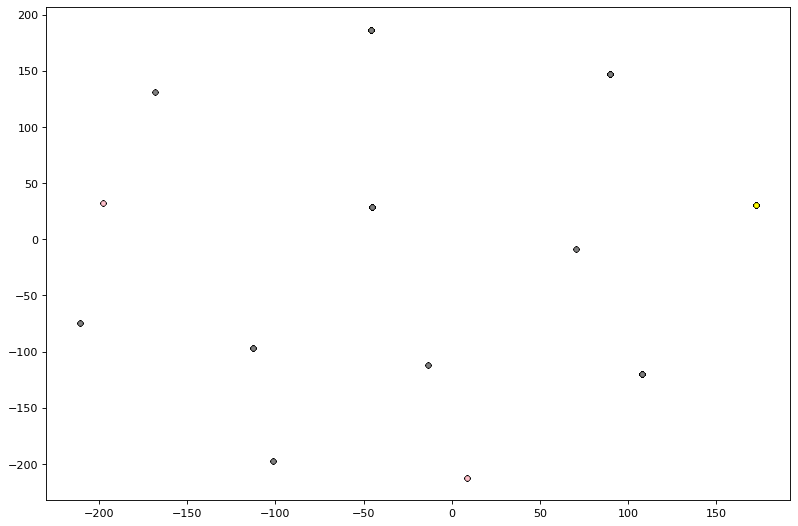

Logistic regression with [0] hops has the following accuracies:
Train acc: 0.6214285714285714; Val acc 0.52; Test acc 0.499
The required training time was 0.01 s
T-SNE of learned proba with [1]


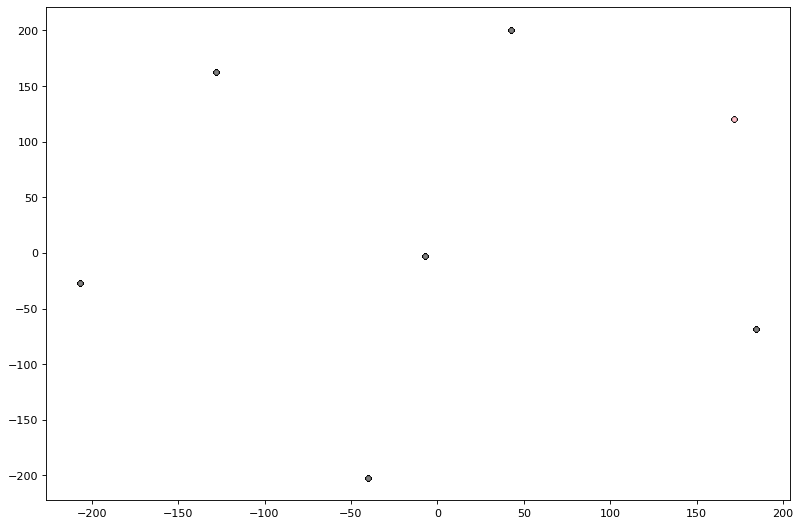

Logistic regression with [1] hops has the following accuracies:
Train acc: 0.7071428571428572; Val acc 0.626; Test acc 0.618
The required training time was 0.03 s
T-SNE of learned proba with [2]


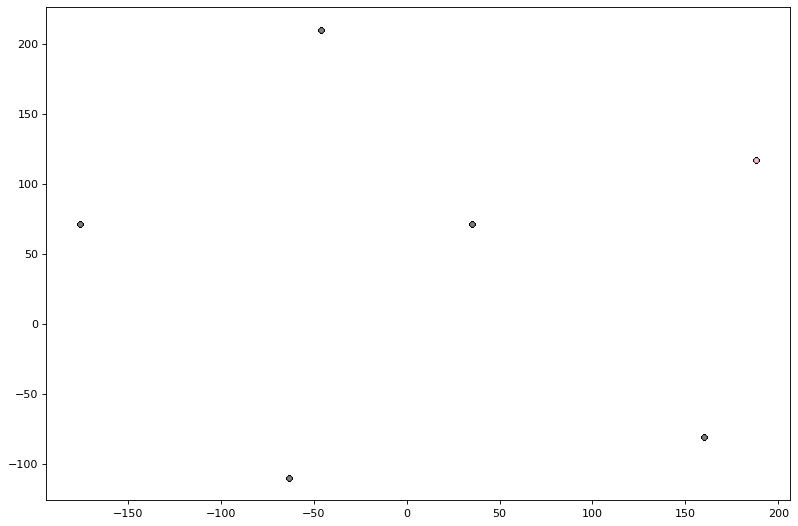

Logistic regression with [2] hops has the following accuracies:
Train acc: 0.7214285714285714; Val acc 0.688; Test acc 0.664
The required training time was 0.06 s
T-SNE of learned proba with [3]


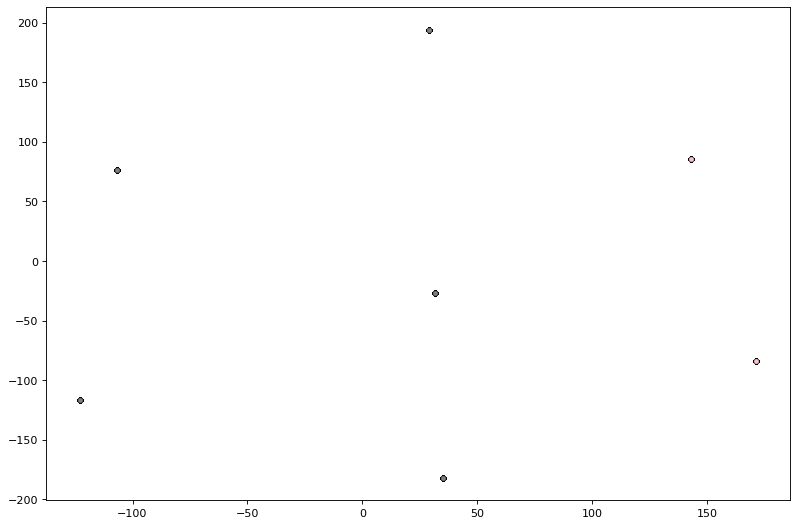

Logistic regression with [3] hops has the following accuracies:
Train acc: 0.8714285714285714; Val acc 0.668; Test acc 0.673
The required training time was 0.1 s
T-SNE of learned proba with [4]


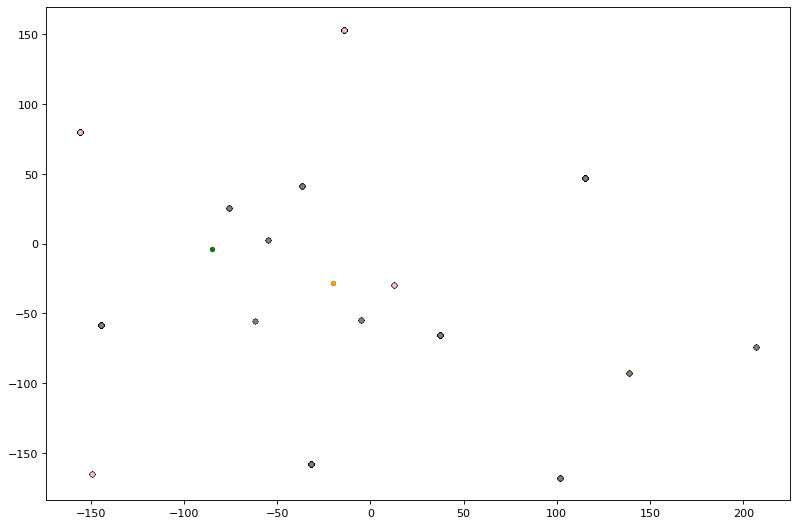

Logistic regression with [4] hops has the following accuracies:
Train acc: 0.95; Val acc 0.698; Test acc 0.71
The required training time was 0.16 s
T-SNE of learned proba with [5]


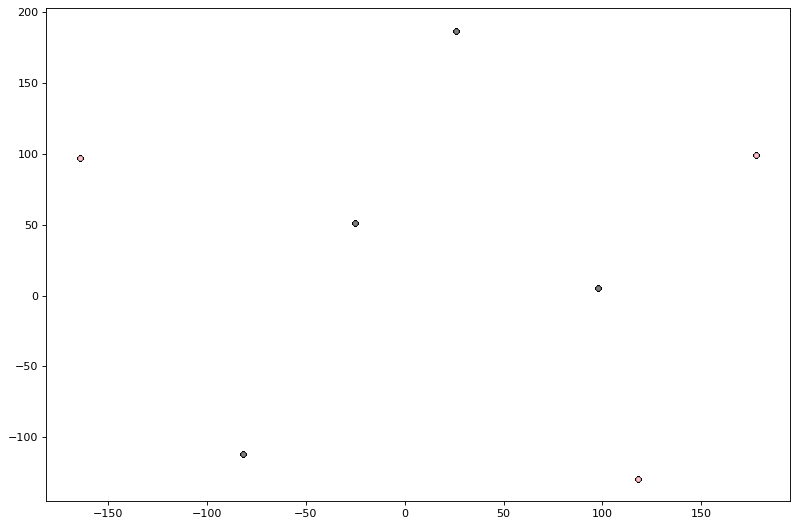

Logistic regression with [5] hops has the following accuracies:
Train acc: 0.85; Val acc 0.698; Test acc 0.692
The required training time was 0.17 s
T-SNE of learned proba with [6]


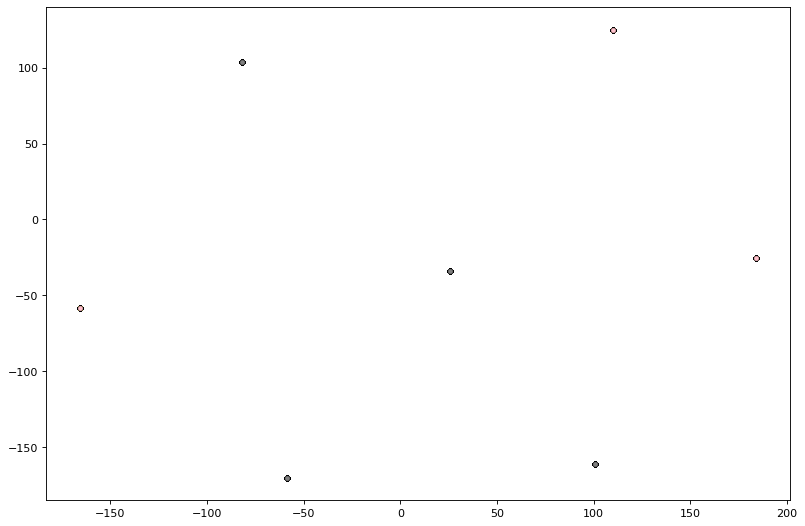

Logistic regression with [6] hops has the following accuracies:
Train acc: 0.8785714285714286; Val acc 0.696; Test acc 0.679
The required training time was 0.2 s
T-SNE of learned proba with [7]


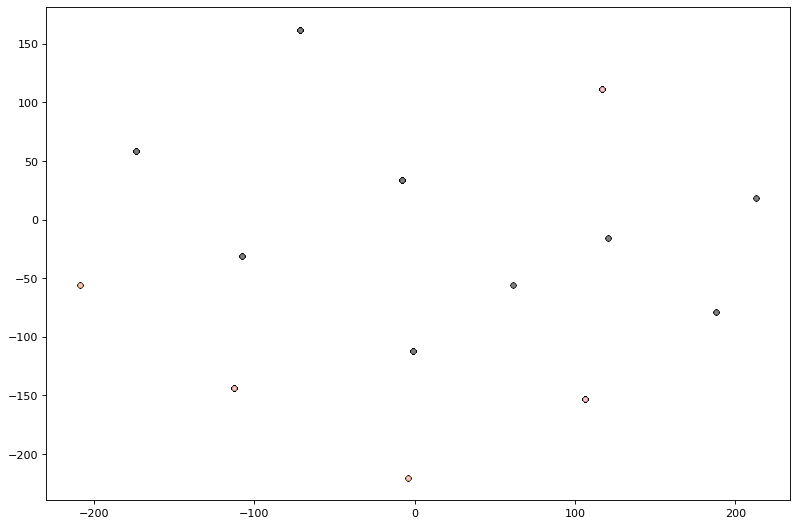

Logistic regression with [7] hops has the following accuracies:
Train acc: 0.8714285714285714; Val acc 0.69; Test acc 0.701
The required training time was 0.24 s
T-SNE of learned proba with [8]


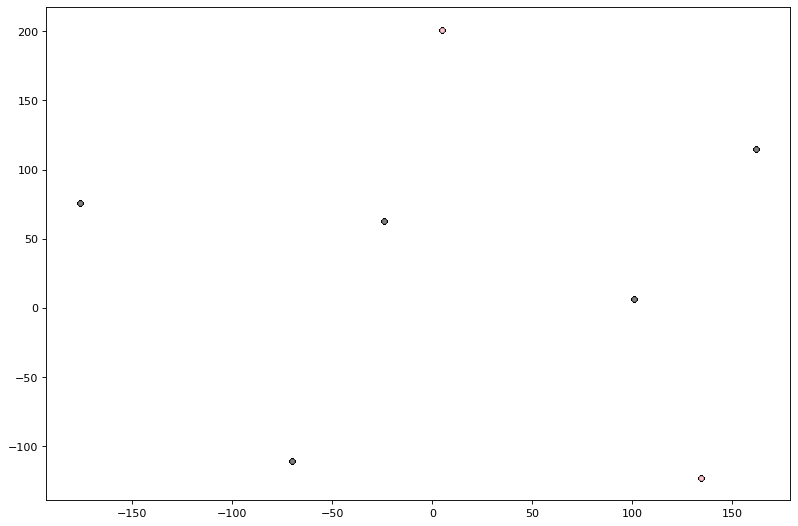

Logistic regression with [8] hops has the following accuracies:
Train acc: 0.8714285714285714; Val acc 0.7; Test acc 0.698
The required training time was 0.24 s
T-SNE of learned proba with [9]


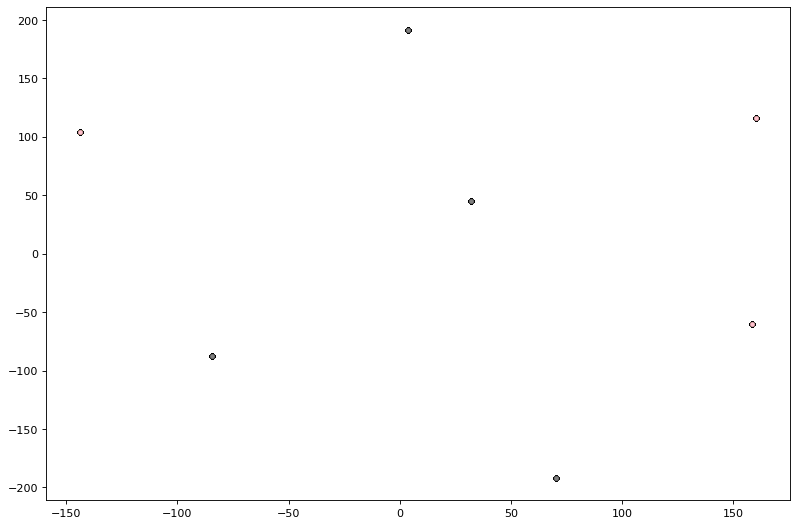

Logistic regression with [9] hops has the following accuracies:
Train acc: 0.8857142857142857; Val acc 0.714; Test acc 0.722
The required training time was 0.27 s
T-SNE of learned proba with [10]


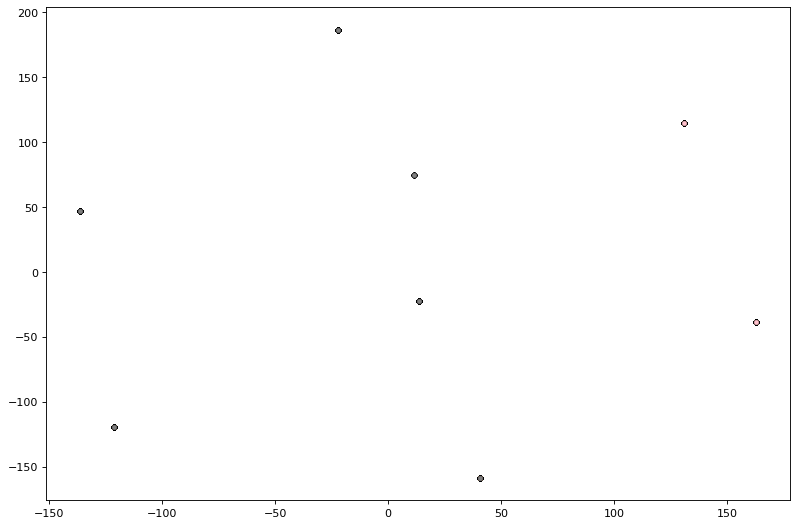

Logistic regression with [10] hops has the following accuracies:
Train acc: 0.8857142857142857; Val acc 0.71; Test acc 0.707
The required training time was 0.29 s
T-SNE of learned proba with [15]


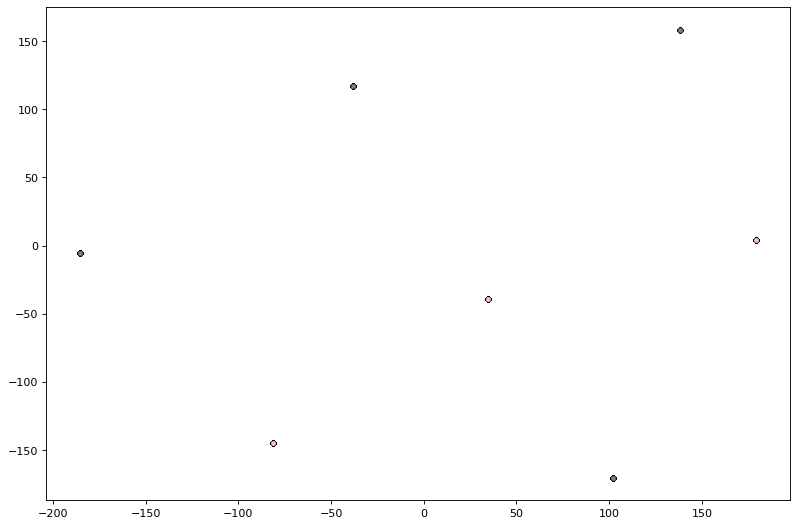

Logistic regression with [15] hops has the following accuracies:
Train acc: 0.8857142857142857; Val acc 0.72; Test acc 0.719
The required training time was 0.4 s
T-SNE of learned proba with [20]


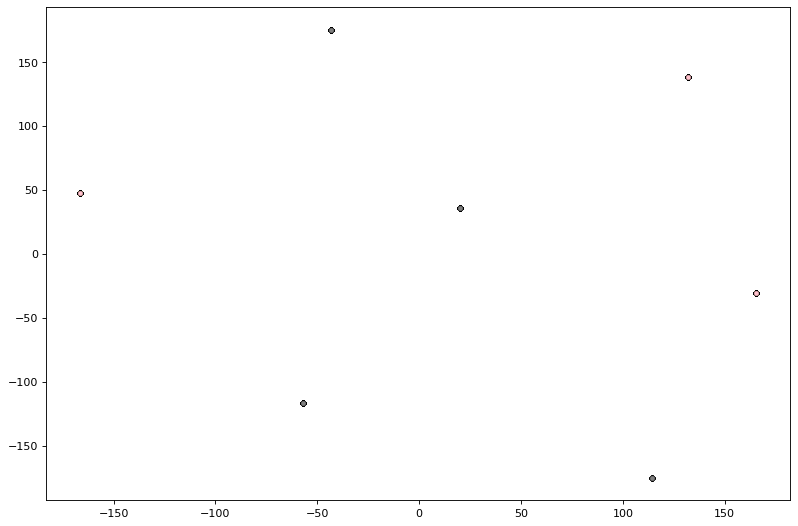

Logistic regression with [20] hops has the following accuracies:
Train acc: 0.8714285714285714; Val acc 0.724; Test acc 0.696
The required training time was 0.51 s
T-SNE of learned proba with [30]


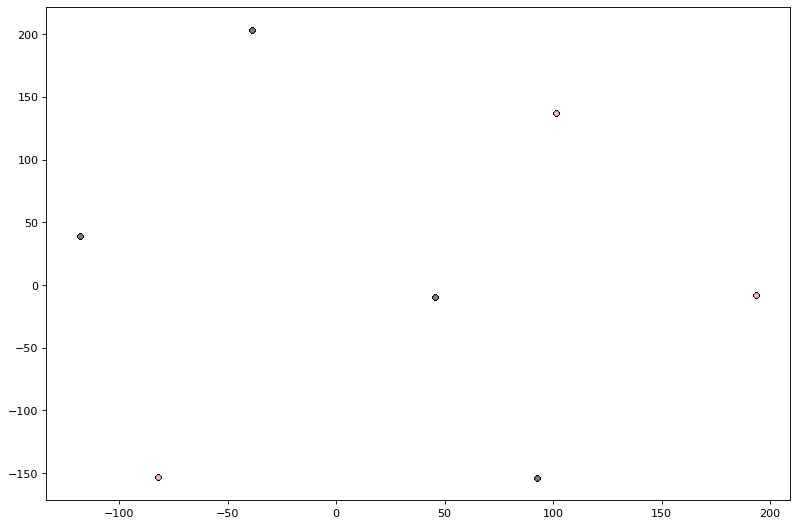

Logistic regression with [30] hops has the following accuracies:
Train acc: 0.8571428571428571; Val acc 0.708; Test acc 0.706
The required training time was 0.73 s
T-SNE of learned proba with [40]


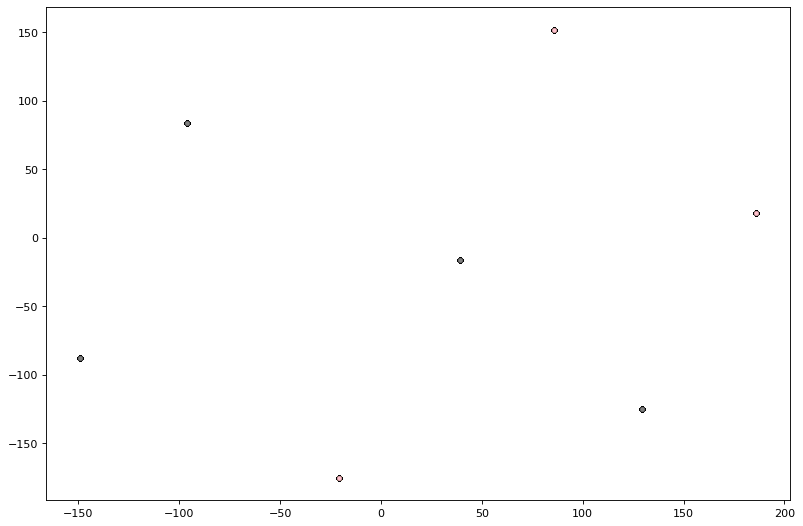

Logistic regression with [40] hops has the following accuracies:
Train acc: 0.8642857142857143; Val acc 0.73; Test acc 0.742
The required training time was 0.95 s
T-SNE of learned proba with [50]


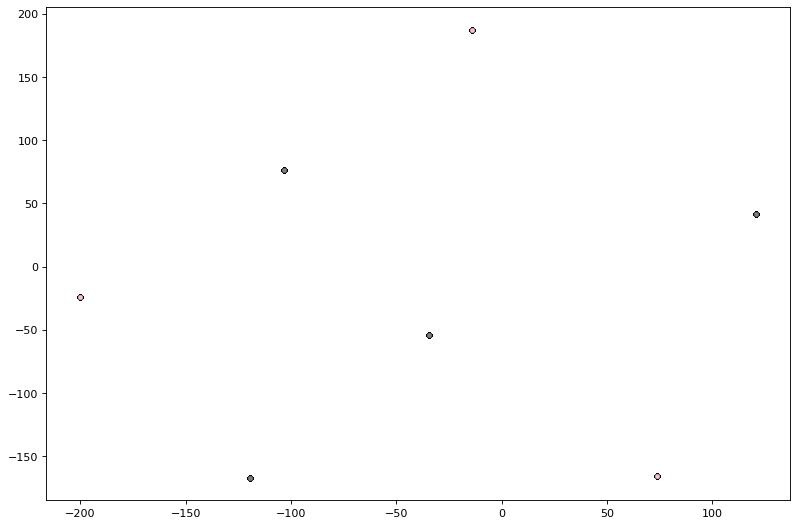

Logistic regression with [50] hops has the following accuracies:
Train acc: 0.8642857142857143; Val acc 0.744; Test acc 0.736
The required training time was 1.17 s


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
from torch.nn.functional import normalize, softmax
import torch
import numpy as np

def user_function(kwargs):
    return normalize(kwargs["original_features"] + kwargs["summed_neighbors"], p = 2.0, dim = 1)

hops_lists = np.expand_dims(evaluated_hops, axis = 1) 
val_scores = []
test_scores = []
train_times = []
for hops_list in hops_lists:

    clfs = [
        DecisionTreeClassifier(**hops_to_best_params[hops], random_state = 42) for hops in hops_list
    ]
    framework = Framework([user_function for i in hops_list], 
                         hops_list=hops_list, 
                         clfs=clfs,
                         gpu_idx=0,
                         handle_nan=0.0,
                        attention_configs=[None for i in hops_list]) 
    new_features = framework.get_features(features, edge_index, torch.ones_like(y).type(torch.bool))
    start = time.time()
    framework.fit(features,
                edge_index,
                y,
                train)
    train_time = time.time()-start
    
    y_pred_val = framework.predict(features,
                    edge_index,
                    val)
    y_pred_test = framework.predict(features,
                    edge_index,
                    test)
    y_pred_train = framework.predict(features,
                    edge_index,
                    train)
    val_score = accuracy_score(y[val], y_pred_val)
    test_score = accuracy_score(y[test], y_pred_test)
    train_score = accuracy_score(y[train], y_pred_train)
    
    val_scores.append(val_score)
    test_scores.append(test_score)
    train_times.append(train_time)
    
    proba = framework.predict_proba(features,
                edge_index,
                 torch.ones_like(y).type(torch.bool))
    print(f"T-SNE of learned proba with {str(hops_list)}")
    plot_tsne(proba)
    print(f"Logistic regression with {str(hops_list)} hops has the following accuracies:\nTrain acc: {str(train_score)}; Val acc {str(val_score)}; Test acc {str(test_score)}")
    print(f"The required training time was {str(round(train_time,2))} s")

In [7]:
assert len(train_times) == len(evaluated_hops.tolist())
assert len(val_scores) == len(evaluated_hops.tolist())
assert len(test_scores) == len(evaluated_hops.tolist())

In [8]:
test_scores_df["hops DT"] = evaluated_hops
test_scores_df["DT"] = test_scores

val_scores_df["hops DT"] = evaluated_hops
val_scores_df["DT"] = val_scores

train_times_df["hops DT"] = evaluated_hops
train_times_df["DT"] = train_times

In [9]:
test_scores_df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,hops LR,Logistic regression,hops SVC,SVC,hops XGB,XGB,hops DT,DT
0,0,0,0,0,0.600,0,0.590,0,0.555,0,0.499
1,1,1,1,1,0.786,1,0.781,1,0.728,1,0.618
2,2,2,2,2,0.819,2,0.817,2,0.765,2,0.664
3,3,3,3,3,0.819,3,0.816,3,0.793,3,0.673
4,4,4,4,4,0.818,4,0.808,4,0.779,4,0.710
5,5,5,5,5,0.822,5,0.810,5,0.781,5,0.692
6,6,6,6,6,0.820,6,0.828,6,0.785,6,0.679
7,7,7,7,7,0.819,7,0.820,7,0.784,7,0.701
8,8,8,8,8,0.814,8,0.823,8,0.763,8,0.698
9,9,9,9,9,0.815,9,0.817,9,0.777,9,0.722


In [10]:
test_scores_df.to_csv(TEST_FILE_PATH)
val_scores_df.to_csv(VAL_FILE_PATH)
train_times_df.to_csv(TRAIN_TIMES_FILE_PATH)